# 本节内容（重要）
- ndarray介绍
- 基础信息
- 类型转换
- 更改阵列形状 reshape&resize
- 转置 transpose & array.T
- 展平 flatten
- 展平为连续数组 ravel
- 删除数组单维条目 squeeze
- 数组堆叠(vstack&hstack)

## 一、Ndarray

NumPy 的 ndarray 是一
个（通常是固定大小）由相同类型和大小的数据组成的多维容器。数组中的维数和项数由其形状定义，形状是由 N 个非负整数组成的元组，指定每个维数的大小。数组中的项类型由单独的数据类型对象（dtype）指定，与每个 ndarray 关联。

NumPy 的数组类称为 ndarray，简称为 array。

> 请注意，numpy.array 与标准 Python 库类 array.array 不同，后者仅处理一维数组且功能较少
>

## 二、基础信息
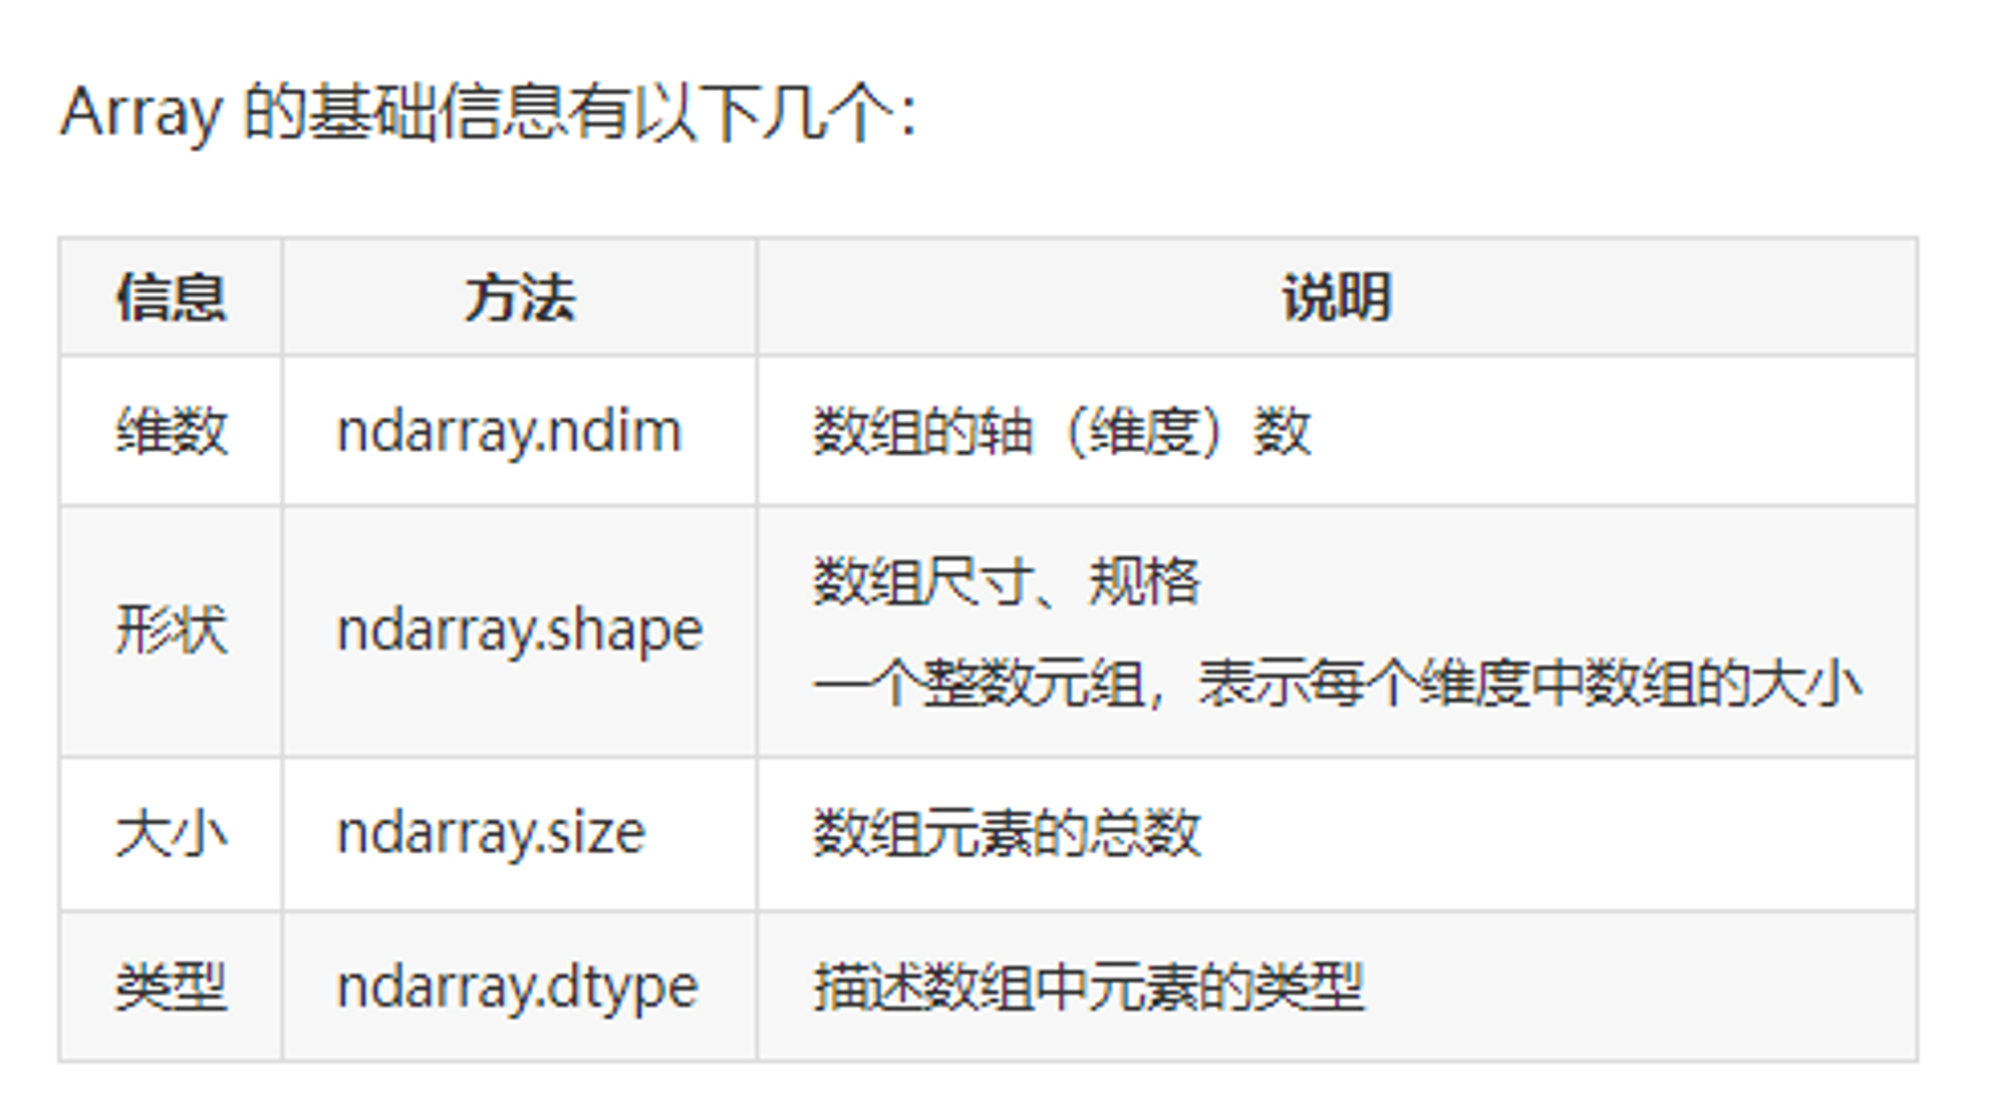

与 Python 中的其他容器对象一样，可以通过对数组进行索引或切片（例如，使用 N 个整数）并通过 ndarray 的方法和属性来访问和修改 ndarray 的内容。


In [54]:
import numpy as np
# 创建15个元素的数组，形状修改成 3 行 5 列
a = np.arange(15).reshape(3, 5)
print(a)
'''
array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])
'''
print(a.shape) # 形状
# (3,5)
print(a.ndim) # 维数
# 2
print(a.dtype.name) # 类型名
# 'int32'
print(a.itemsize) # 一个数组元素的字节总长度（和类型也相关）;数组中每个元素以字节为单位的大小， 例如，float64 类型的元素数组的项目大小为8（= 64/8），而complex32 类型的元素数组的项目大小为 4（= 32/8）。
# 4
print(a.size) # 大小，元素数
print(a.dtype) #数据类型
# dtype('int32')
# 15
print(type(a))
# <class 'numpy.ndarray'>


[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
(3, 5)
2
int32
4
15
int32
<class 'numpy.ndarray'>


## 三、类型转换
ndarray.astype 是最为常用的类型转换方法，它作用于 ndarray ，可以将原数据转换为我们想要的类型，当然数据特征需要满足目标类型的要求

```python
# astype 语法
ndarray.astype(dtype, order='K', casting='unsafe',
               subok=True, copy=True)
```

其中参数有：

- dtype: str or dtype（dtype 对象）将数组强制转换为的类型代码或数据类型
- order: {‘C’, ‘F’, ‘A’, ‘K’}, optional控制结果的内存布局顺序。
    - “C”表示 C 顺序
    - “F” 表示 Fortran 顺序
    - “A”表示“F”顺序（如果所有数组都是Fortran连续的），否则是 “C” 顺序
    - “K”表示尽可能接近数组元素在内存中出现的顺序。默认值为“K”。
- casting: {‘no’, ‘equiv’, ‘safe’, ‘same_kind’, ‘unsafe’}, optional控制可能发生的数据转换类型,，默认为 “unsafe” 以实现向后兼容性。
    - ‘no’ 数据类型根本不应该被强制转换
    - ‘equiv’ 只允许更改字节顺序
    - ‘safe’ 只允许保留值的强制转换。
    - ‘same_kind’ 只允许安全强制转换或类内强制转换，如 float64 到 float32
    - ‘unsafe’ 可以进行任何数据转换
- subok: bool, optional如果为True，则传递子类（默认），否则返回的数组将强制为基类数组
- copy: bool, optional默认情况下，astype 总是返回新分配的数组，如果设置为 false，并且满足了 dtype、order 和 subok 要求，则返回输入数组而不是副本

In [38]:
x = np.array([1, 2, 3.4])
print(x)
# array([1. , 2. , 3.4])
print(x.astype(int))
b = x.astype(int)
# array([1, 2, 3])
print(x.dtype) # dtype('float64')
print(b.dtype) # dtype('int32')
print("---------------")
# 理解部分内容转换
a = np.array([[1,2,3],
              [4,5,6]])
print(a[:,1])
# array([2, 5])
print(a[:,1].astype('str')) # 转换后生成此副本
# array(['2', '5'], dtype='<U21')
print(a.dtype)   # 原来的数组没有改变
# dtype('int64')
print("---------------")
# 构造一个时间表达数据
arr = [2020, 12, 0.6552562894775783]
custom_type = np.dtype([
                        ('YEAR',np.uint16),
                        ('DOY', np.uint16),
                        ('REF',np.float16)
                        ])
d = np.array([tuple(arr)], custom_type)
print(d)
'''
array([(2020, 12, 0.6553)],
      dtype=[('YEAR', '<u2'), ('DOY', '<u2'), ('REF', '<f2')])
'''
print(d['YEAR']) # array([2020], dtype=uint16)

[1.  2.  3.4]
[1 2 3]
float64
int32
---------------
[2 5]
['2' '5']
int32
---------------
[(2020, 12, 0.6553)]
[2020]


## 四、NumPy 更改阵列形状(重要）
NumPy 常用的数据变形操作有：
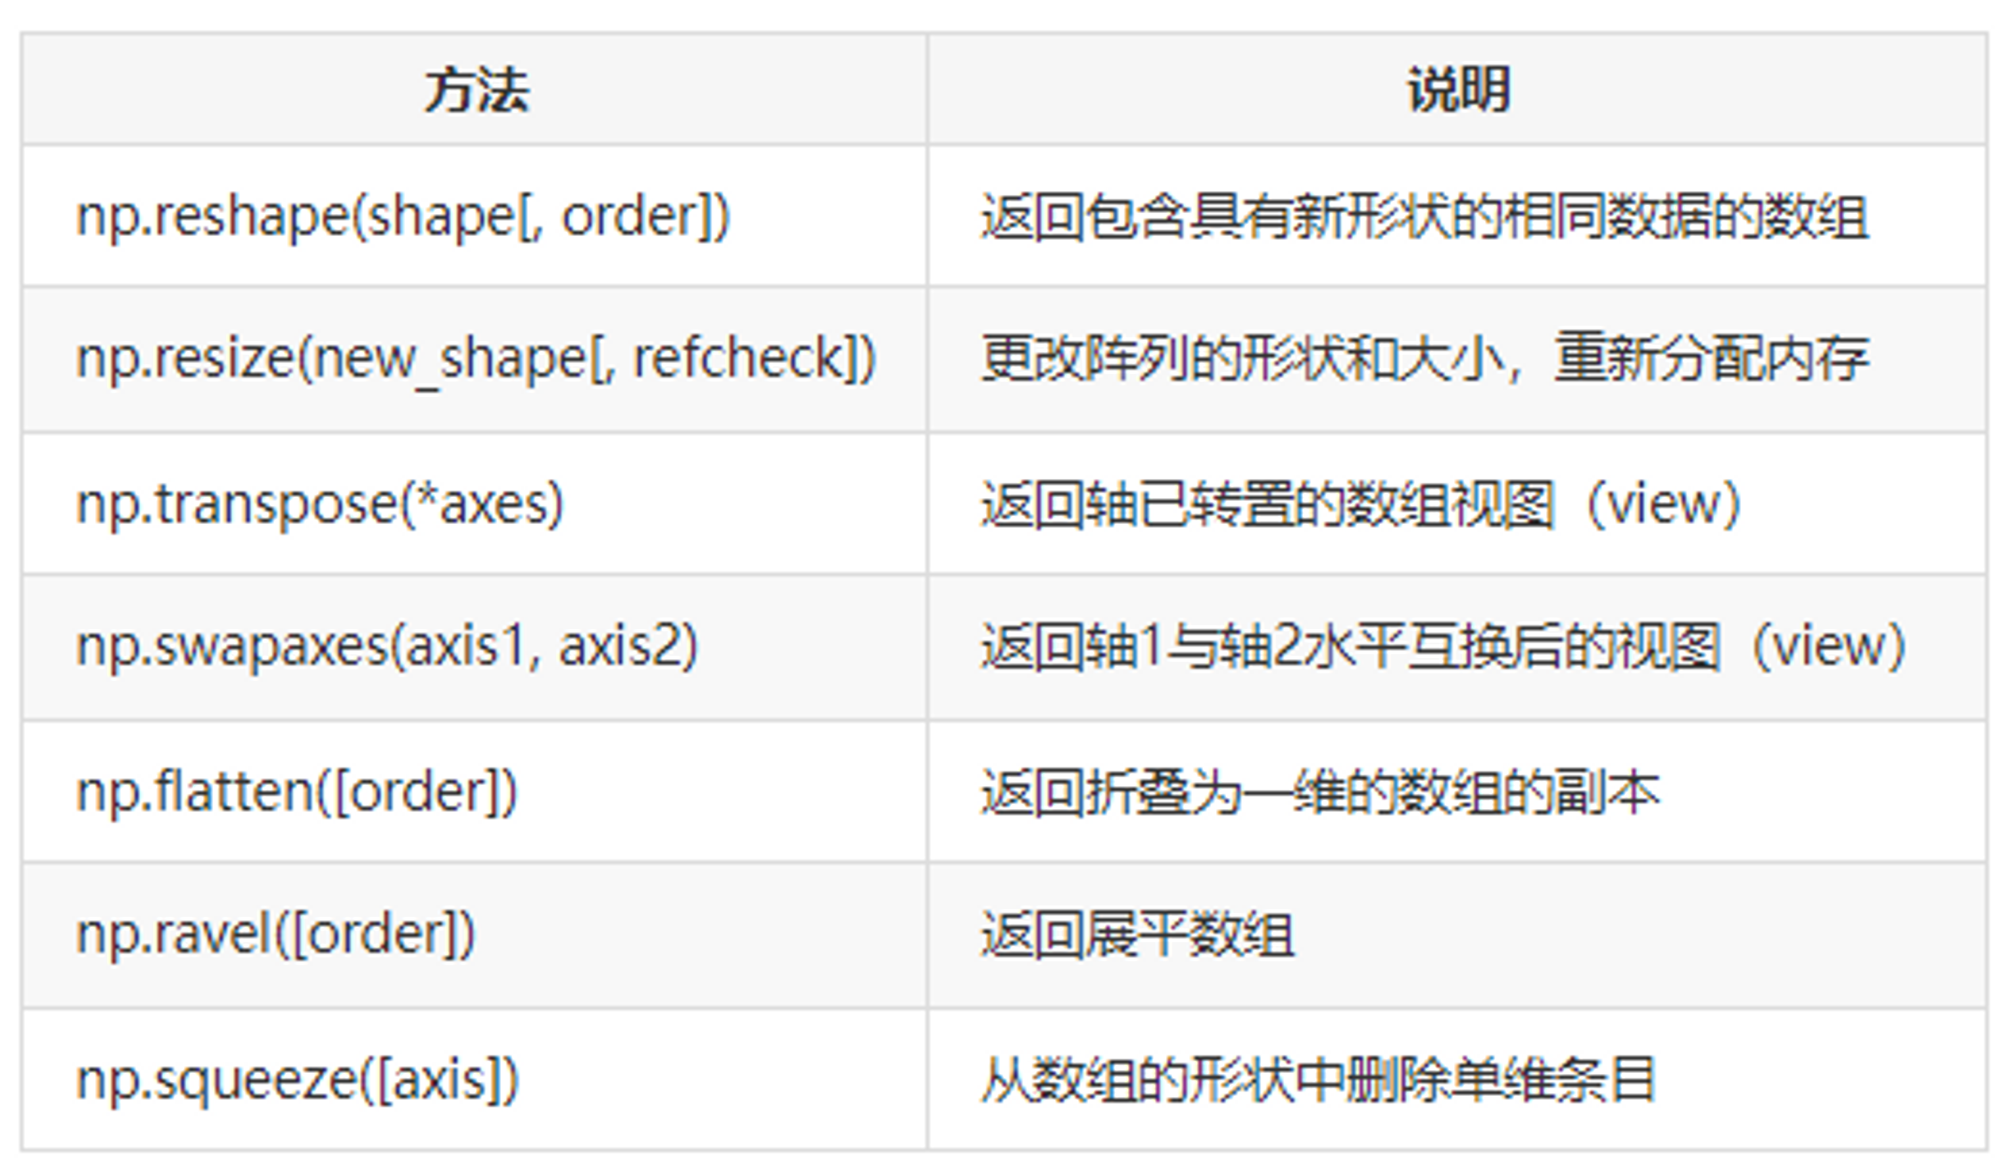

### 4.1、数组变形 np.reshape
NumPy 提供了 numpy.reshape 和 ndarray.reshape 两个层面的变形方法，它的实现的效果是一样的，返回包含具有新形状的相同数据的数组。新形状应与原形状兼容



In [55]:
#ndarray.reshape
a = np.array([[1,2,3], 
              [4,5,6]])
print(a)
print('---------------')

#ndarray reshape
# 以下方法只管指定行列数，其他位置用-1，会自动计算
print(a.reshape([-1, 3])) # 要3列（常用）
print('---------------')
print(a.reshape([2, -1])) # 要两行，效果相同（常用）
print('---------------')
print(a.reshape(6)) # 一维，6列
print('---------------')
print(a.reshape(-1)) # 同上
# array([1, 2, 3, 4, 5, 6])
print('---------------')
print(a.reshape([3,2])) # 转为3行两列
print('---------------')

print(a.reshape([2, 4])) # 报错，形状无法兼容
# Traceback (most recent call last) ----> 1 a.reshape([2, 4])
# ValueError: cannot reshape array of size 6 into shape (2,4)




[[1 2 3]
 [4 5 6]]
---------------
[[1 2 3]
 [4 5 6]]
---------------
[[1 2 3]
 [4 5 6]]
---------------
[1 2 3 4 5 6]
---------------
[1 2 3 4 5 6]
---------------
[[1 2]
 [3 4]
 [5 6]]
---------------


ValueError: cannot reshape array of size 6 into shape (2,4)

In [39]:
# numpy reshape
a = np.arange(6).reshape((3, 2))
print(a)
print('---------------')
b = np.reshape(a, (2, 3)) # C-like 索引顺序
print(b)
print('---------------')
# np.ravel(a)-->np.reshape(-1)
c = np.reshape(np.ravel(a), (2, 3)) # 相当于 C ravel 然后 C 重塑
d = np.reshape(np.reshape(a,(-1)), (2, 3)) # 相当于 C ravel 然后 C 重塑
print(c)
print(d)

[[0 1]
 [2 3]
 [4 5]]
---------------
[[0 1 2]
 [3 4 5]]
---------------
[[0 1 2]
 [3 4 5]]
[[0 1 2]
 [3 4 5]]


### 4.2、更改形状 np.resize
- 1、`numpy.resize(a, new_shape)` 和 `ndarray.resize(new_shape, refcheck=True)` 等同的作用，`numpy.resize` 如果新数组比原始数组大，则新数组中会填充 a 的重复副本。请注意，此行为与 `ndarray.resize` 不同，后者填充 0 而不是 a 的重复副本

- 2、resize 将在必要时为数据区域重新分配空间，当数组的总大小不变时，应使用 reshape

In [41]:
a=np.array([[0,1],
            [2,3]])
print(np.resize(a,(2,3)))
print('---------------')
print(np.resize(a,(1,4)))
print('---------------')
# array([[0, 1, 2, 3]])
print(np.resize(a,(2,4)))


[[0 1 2]
 [3 0 1]]
---------------
[[0 1 2 3]]
[[0 1]
 [2 3]]
---------------
[[0 1 2 3]
 [0 1 2 3]]


**缩小数组**：数组被展平、调整大小和形状

In [42]:
#nadaryy reize
a = np.array([[0, 1], 
              [2, 3]], order='C')
a.resize((2, 1))
print(a)
'''
array([[0],
       [1]])
'''

a2 = np.array([[0, 1], 
               [2, 3]], order='F')
a2.resize((2, 1))
print(a2)
'''
array([[0],
       [2]])
'''

[[0]
 [1]]
[[0]
 [2]]


'\narray([[0],\n       [2]])\n'

**放大数组**：如上所述，但缺少的条目用零填充：

In [12]:
b = np.array([[0, 1], 
              [2, 3]])
print(b.resize(2, 3)) # 新的形状参数不必是元组
print(b)
'''
array([[0, 1, 2],
       [3, 0, 0]])
'''

[[0 1 2]
 [3 0 0]]


'\narray([[0, 1, 2],\n       [3, 0, 0]])\n'

resize 和 reshape 的区别：

- resize 如果新数组比原数组大，则将会copy原数组中的值对新数组进行填充
- reshape 在不改变原数组数据的情况下，将它 reshape 成一个新的维度，如果给定的数组数据和需要reshape的形状不符合时，将会报错

## 五、转置 transpose & array.T
- 1、`ndarray.transpose(*axes)` 和 `ndarray.T` 效果一样。

- 2、对于一维数组，这没有任何影响，因为转置向量只是同一个向量

In [53]:
a = np.array([[0, 1], 
              [2, 3]])
print(a)
print("========1==========")
'''
[[0 1]
 [2 3]]
'''
print(a.transpose())
print("=========2=========")
'''
[[0 2]
 [1 3]]
'''
# (2,2)->2:0维，2:1维
print(a.transpose(0,1))
print("=========3=========")
'''
[[0 1]
 [2 3]]
'''
print(a.transpose(1,0))
print("=========4=========")
'''
[[0 2]
 [1 3]]
'''
# T 操作
x = np.array([[0, 1],
              [2, 3]])
print(x)
print("=========5=========")
'''
[[0 1]
 [2 3]]
'''
print(x.T)
print("=========6=========")
'''
[[0 2]
 [1 3]]
'''
#一维向量
x = np.array([1.,2.,3.,4.])
print(x)
# array([ 1.,  2.,  3.,  4.])
print("=========7=========")
print(x.T)
# array([ 1.,  2.,  3.,  4.])

[[0 1]
 [2 3]]
========1==========
[[0 2]
 [1 3]]
=========2=========
[[0 1]
 [2 3]]
=========3=========
[[0 2]
 [1 3]]
=========4=========
[[0 1]
 [2 3]]
=========5=========
[[0 2]
 [1 3]]
=========6=========
[1. 2. 3. 4.]
=========7=========
[1. 2. 3. 4.]


**transpose转置说明：**

- x[0][0] == 0
- x[0][1] == 1
- x[1][0] == 2
- x[1][1] == 3

'''
[[0 1]

 [2 3]]
'''

我们不妨设第一个方括号“[]”为 0轴 ，第二个方括号为 1轴 ，则x可在 0-1坐标系 下表示如下：


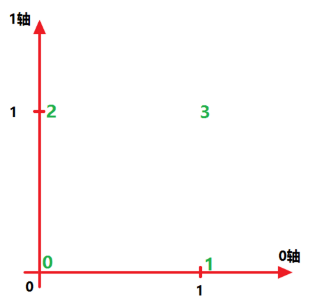
- 1、x.transpose((0,1)) 表示按照原坐标轴改变序列，也就是保持不变
- 2、x.transpose((1,0)) 表示交换 ‘0轴’ 和 ‘1轴’，所以就得到如下图所示结果：


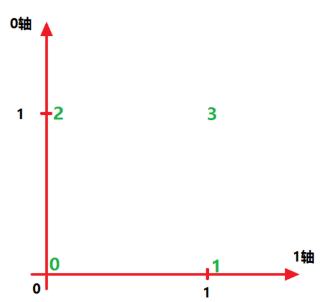


## 六、展平 flatten
ndarray.flatten(order='C') 返回折叠为一维的数组的副本，order 参数可选 {‘C’, ‘F’, ‘A’, ‘K’}。


In [15]:
a = np.array([[1,2],
              [3,4]])
print(a.flatten())
# array([1, 2, 3, 4])
print(a.flatten('F'))
# array([1, 3, 2, 4])

[1 2 3 4]
[1 3 2 4]


`“C”表示按行为主（C样式）顺序展平。“F”表示按列为主（Fortran 样式）顺序展平。`

## 七、展平为连续数组 ravel
- 1、`numpy.ravel(a, order='C')` 如同 `ndarray.ravel([order])` 返回一个连续的扁平数组，包含输入元素的一维数组

- 2、返回的数组将具有与输入数组相同的类型，例如，将为屏蔽数组输入返回屏蔽数组。

In [16]:
x = np.array([[1, 2, 3], 
              [4, 5, 6]])
# 等同于 reshape(-1, order=order)
np.ravel(x)
# array([1, 2, 3, 4, 5, 6])
x.reshape(-1)
# array([1, 2, 3, 4, 5, 6])
np.ravel(x, order='F')
# array([1, 4, 2, 5, 3, 6])

array([1, 4, 2, 5, 3, 6])

ravel和flatten的区别：
- 两者的区别在于返回拷贝（copy）还是返回视图（view）， 
- numpy.ravel() 返回的是视图，会影响原始矩阵；numpy. flatten() 返回的是拷贝，对拷贝所做的修改不会影响原始矩阵

`平时使用的时候flatten()更为合适.在使用过程中flatten()分配了新的内存`

In [45]:

a = np.arange(12).reshape(3,4)
print(a)
# [[ 0  1  2  3]
#  [ 4  5  6  7]
#  [ 8  9 10 11]]
 
# 创建一个和a相同内容的数组b
b = a.copy()
c = a.ravel()
d = b.flatten()
# 输出c和d数组
print(c)
# [ 0  1  2  3  4  5  6  7  8  9 10 11]
print(d)
# [ 0  1  2  3  4  5  6  7  8  9 10 11]
# 可以看到c和d数组都是扁平化后的数组,具有相同的内容
 
print(a is c)
# False
print(b is d)
# False
# 可以看到以上a,b,c,d是四个不同的对象
 
# 但因为c是a的一种展示方式,虽然他们是不同的对象,但在修改c的时候,a中相应的数也改变了
c[1] = 99
d[1] = 99
print(a) #ravel
# [[ 0 99  2  3]
#  [ 4  5  6  7]
#  [ 8  9 10 11]]
print(b) #flatten
# [[ 0  1  2  3]
#  [ 4  5  6  7]
#  [ 8  9 10 11]]
print(c)
# [ 0 99  2  3  4  5  6  7  8  9 10 11]
print(d)
# [ 0 99  2  3  4  5  6  7  8  9 10 11]


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
False
False
[[ 0 99  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0 99  2  3  4  5  6  7  8  9 10 11]
[ 0 99  2  3  4  5  6  7  8  9 10 11]


## 八、去掉为1的维度 squeeze
- 1、`ndarray.squeeze(axis=None)` 和 `numpy.squeeze(a, axis=None)[source]`从数组的形状中删除单维度条目,即把 shape 中为1的维度去掉
- 2、将输入的数组删除长度为1的所有维度或维度的子集

In [46]:
c  = np.arange(10).reshape(2,5)
print(c)
print(np.squeeze(c))
print("-----------------")
d = np.arange(10).reshape(1,2,5)
print(d)
print(d.shape)
print("-----------------")
print(np.squeeze(d))
print(np.squeeze(d).shape)

print("-----------------")
e = np.arange(10).reshape(2,1,5)
print(e)
print(e.shape)
print("-----------------")
print(np.squeeze(e))
print(np.squeeze(e).shape)

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[0 1 2 3 4]
 [5 6 7 8 9]]
-----------------
[[[0 1 2 3 4]
  [5 6 7 8 9]]]
(1, 2, 5)
-----------------
[[0 1 2 3 4]
 [5 6 7 8 9]]
(2, 5)
-----------------
[[[0 1 2 3 4]]

 [[5 6 7 8 9]]]
(2, 1, 5)
-----------------
[[0 1 2 3 4]
 [5 6 7 8 9]]
(2, 5)


## 九、数组堆叠(vstack&hstack)
多个数组可以沿不同的轴堆叠在一起

In [34]:
a = np.array([[0, 1],
              [2, 3]])
print(a)

b = np.array([[5, 6], 
              [7, 8]])
print(b)
print("---------------")
print(np.vstack((a, b)))
print("---------------")
print(np.hstack((a, b)))


[[0 1]
 [2 3]]
[[5 6]
 [7 8]]
---------------
[[0 1]
 [2 3]
 [5 6]
 [7 8]]
---------------
[[0 1 5 6]
 [2 3 7 8]]
